Importing the libraries

Linear regression is a supervised learning algorithm used to pridict a continus data from a given set of labled data.When we have infinit large range of possible output value, linear regression is a good choice.

In this model i have trained a model to pridict the output price of the car based on 4 input featrures, i.e the enginsie, stroke, horsepower, peakrpm

MODEL: 
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 


In [116]:
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

Importing the data set and spliting it into train,tests and cross validation set as follow :
train set:60%
test  set:20%
Cv    set:20%

In [117]:
x1=pd.read_csv("./CarPrice_Assignment_1.csv")
x=np.array(x1)[0:,0:4]
y=np.array(x1)[0:,4:]
#spliting data set
xtrain=x[0:120]
ytrain=y[0:120]
xtest=x[120:180]
ytest=y[120:180]
xcv=x[180:]
ycv=y[180:]
#making some observations
print(x.shape)
print(y.shape)



(205, 4)
(205, 1)


In [118]:
# w=np.array([1,2,3,4])
# xtrain[0]
# print(f"the type of w is {type(w)} and the type of xtrain is {type(xtrain)}")
# print(f"the shape of w is {w.shape} and the shape of xtrain[0] is {xtrain[0].shape}")
# print(f"the value of w.xtrain[0] is {np.dot(w,xtrain[0])}")

The model for price prediction is defined as follow :


$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`
,here the value of n is 3






The cost function for the model is defined as follow: 
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 



In [119]:
# cost function 
def compute_cost(x,y,w,b):
    # the shape of x vectore is (150,4) - ndarrya
    # the shape of y vectore is (150,1) -ndarray
    # the shape of w vectore is (4,)    -ndarray
    # the value b is a scaler 
    m=x.shape[0]
    total_cost=0
    for i in range(m):
        fwb=np.dot(w,xtrain[i]) + b
        cost=(fwb-y[i][0])**2
        total_cost+=cost
    total_cost=total_cost/(2*m)
    return total_cost


# testing the function



<a name="toc_15456_5"></a>
#  Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \ \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [120]:
#gradient descent
def compute_gradient(x,y,w,b):
    djdw=0
    djdb=0
    m=x.shape[0]
    for i in range(m):
        fwb=np.dot(w,xtrain[i]) + b
        djdwi=(fwb-y[i][0])*sum(w)
        djdbi=(fwb-y[i][0])
        djdw+=djdwi
        djdb+=djdbi
    djdw=djdw/m
    djdb=djdb/m
    return djdw,djdb


Once the gradinet dj_dw and dj_db are converged we force the gradient descent to stop using the below function

In [121]:
# this function is used to stop gradient descent once gradient descent ha successfully converged

def is_converging(Hist):
    x=Hist[-1][0]
    y=Hist[-1][1]
    if abs(x)<0.5 and abs(y)<0.5:
        return True
    return False

In [122]:
def gradient_descent(x,y,w,b,alpha,no_of_iter,compute_cost,compute_gradient):
    # the shape of x vectore is (150,4) - ndarrya
    # the shape of y vectore is (150,1) -ndarray
    # the shape of w vectore is (4,)    -ndarray
    # the value b is a scaler 
    jHist=[]
    gradHist=[]
    djdwHist=[]
    djdbHist=[]
    wHist=[]
    bHist=[]
    for i in range(no_of_iter):
        #breaking loop if converged
        if i!=0:
            if is_converging(gradHist):
                print(f"successfully converged at {i}th itertation")
                break
        #calculating the gradient
        djdw,djdb=compute_gradient(x,y,w,b)
        #simulataneous updating
        w=w-((alpha)*djdw)
        b=b-((alpha)*djdb)
        #storing the data set for analysis
        jHist.append(compute_cost(x,y,w,b))
        gradHist.append(compute_gradient(x,y,w,b))
        djdwHist.append(djdw)
        djdbHist.append(djdb)
        wHist.append(w)
        bHist.append(b)
        #prinitng output on every 10th iteration
        if i%10==0:
            print(f"cost: {compute_cost(x,y,w,b)} gradient value: {compute_gradient(x,y,w,b)}")
    return w,b,jHist,gradHist,djdwHist,djdbHist,wHist,bHist

In [123]:
#initial parameters
w_initial=np.array([1,2,3,4])
b_initial=1
alpha=(1/1000000)
no_of_iter=1000
w_final,b_final,jHist_final,gradHist_final,djdwHist_final,djdbHist_final,wHist_final,bHist_final=gradient_descent(xtrain[0:100],ytrain[0:100],w_initial,b_initial,alpha,no_of_iter,compute_cost,compute_gradient)


# plt.plot([k for k in range(1,len(jHist_final)+1)],jHist_final,c='r')
# plt.xlabel("no of iteration")
# plt.ylabel("value of cost")

cost: 78120627.49320938 gradient value: (68457.34924048997, 7056.37719744673)
cost: 61778190.8889217 gradient value: (33508.31357414089, 4345.696396416059)
cost: 56132364.88670375 gradient value: (19409.37791337635, 2914.5022360372122)
cost: 53720088.79241353 gradient value: (12348.77652056689, 2049.759465800593)
cost: 52550720.83111473 gradient value: (8329.909295756637, 1484.91944874676)
cost: 51933825.96591525 gradient value: (5842.29801873493, 1097.1662084581465)
cost: 51587693.23753162 gradient value: (4210.220134432097, 821.8724028533425)
cost: 51383939.552126005 gradient value: (3093.622070499765, 621.7413436412136)
cost: 51259187.07669701 gradient value: (2305.7300521848324, 473.74322174559535)
cost: 51180197.78754206 gradient value: (1736.7685567391152, 362.91175646383294)
cost: 51128690.98942048 gradient value: (1318.6435413431727, 279.13002804753273)
cost: 51094214.26790173 gradient value: (1007.2325734381002, 215.34600589599577)
cost: 51070591.28566757 gradient value: (772.

cost: 51054065.44195533 gradient value: (595.1936844267611, 129.00117302354275)
cost: 51042291.24202203 gradient value: (459.585084067097, 100.07044729773223)
cost: 51033768.17919015 gradient value: (355.61710888670177, 77.71023730336687)
cost: 51027514.06144756 gradient value: (275.61480225689303, 60.395779274964895)
cost: 51022871.86932412 gradient value: (213.8785546686671, 46.96893776761521)
cost: 51019393.022668846 gradient value: (166.13250679611178, 36.54507477425972)
cost: 51016765.3636785 gradient value: (129.1428161881976, 28.44547181624448)
cost: 51014767.84196553 gradient value: (100.44793671937038, 22.147595458865926)
cost: 51013241.445069075 gradient value: (78.16461801144898, 17.248068485447128)
cost: 51012070.190533 gradient value: (60.84624612143569, 13.434840328852315)
cost: 51011168.45967577 gradient value: (47.37808960949704, 10.466112189267314)
cost: 51010472.39911431 gradient value: (36.89902324226776, 8.15428017076414)
cost: 51009933.97803883 gradient value: (28.

Text(0, 0.5, 'value of cost')

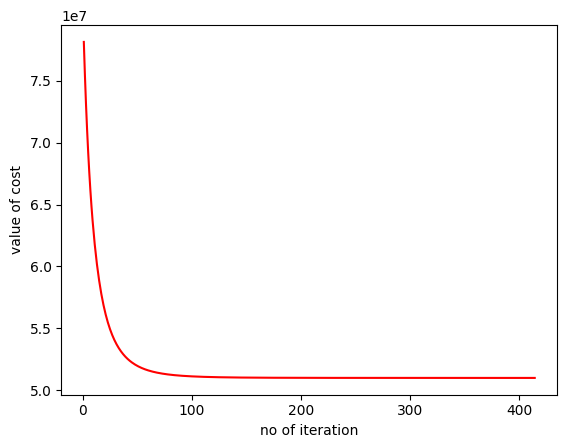

In [124]:
plt.plot([k for k in range(1,len(jHist_final)+1)],jHist_final,c='r')
plt.xlabel("no of iteration")
plt.ylabel("value of cost")

[-0.37019933  0.62980067  1.62980067  2.62980067]


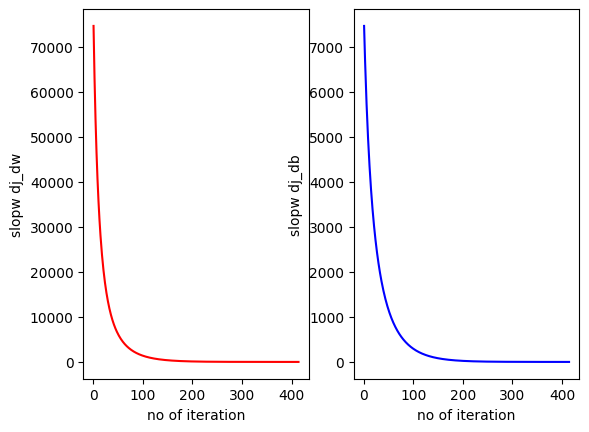

In [125]:
#plotting the slopes
plt.subplot(121)
plt.plot([k for k in range(1,len(djdwHist_final)+1)], djdwHist_final,c='r')
plt.xlabel("no of iteration")
plt.ylabel("slopw dj_dw")
plt.subplot(122)
plt.plot([k for k in range(1,len(djdbHist_final)+1)], djdbHist_final,c='b')
plt.xlabel("no of iteration")
plt.ylabel("slopw dj_db")
print(w_final)




In [126]:
k=0
print(f"the actual value is {ytrain[k]}")
fwb=np.dot(w_final,xtrain[k]) + b_final
print(f"the pridicted value is {fwb}")



the actual value is [13495.]
the pridicted value is 13284.275911665485


In [135]:
for k in range(10):
    print(f"test #{k}")
    print(f"the actual value is {ycv[k]}")
    print(f"the pridicted value is {np.dot(w_final,xcv[k] + b_final)}")
    print(f"total error in pridiction {(abs(np.dot(w_final,xcv[k] + b_final)-ycv[k])/ycv[k])*100} %")

test #0
the actual value is [15690.]
the pridicted value is 13871.645938216345
total error in pridiction [11.5892547] %
test #1
the actual value is [15750.]
the pridicted value is 13875.347931562277
total error in pridiction [11.90255282] %
test #2
the actual value is [7775.]
the pridicted value is 12677.652643644517
total error in pridiction [63.05662564] %
test #3
the actual value is [7975.]
the pridicted value is 13910.403973020853
total error in pridiction [74.42512819] %
test #4
the actual value is [7995.]
the pridicted value is 12677.652643644517
total error in pridiction [58.56976415] %
test #5
the actual value is [8195.]
the pridicted value is 13910.403973020853
total error in pridiction [69.74257441] %
test #6
the actual value is [8495.]
the pridicted value is 13910.403973020853
total error in pridiction [63.74813388] %
test #7
the actual value is [9495.]
the pridicted value is 11914.789254669004
total error in pridiction [25.48487893] %
test #8
the actual value is [9995.]
the

Checking high variance and high bias


In [128]:
def compute_single_cost(x,y,w,b):
    fwb=np.dot(x,w)+b
    cost=(fwb-y)**2
    return cost[0]
#computing Jtrain
cost=0
cost_Hist=[]
for k in range(xtrain.shape[0]):
    cost+=compute_single_cost(xtrain[k],ytrain[k],w_final,b_final)
    cost_Hist.append(compute_single_cost(xtrain[k],ytrain[k],w_final,b_final))
#computing Jcv
cvCost=0
cvCost_Hist=[]
for k in range(xcv.shape[0]):
    cvCost+=compute_single_cost(xcv[k],ycv[k],w_final,b_final)
    cvCost_Hist.append(compute_single_cost(xcv[k],ycv[k],w_final,b_final))




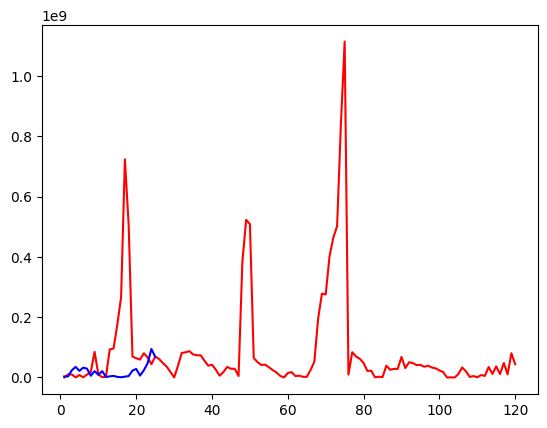

In [134]:
plt.plot([k for k in range(1,len(cost_Hist)+1)] , cost_Hist , c='r')
plt.plot([k for k in range(1,len(cvCost_Hist)+1)],cvCost_Hist,c='b')


Conclusion: the error values of Jtrain are much higher as compared to Jcv. we can conclude that its a high bias model